In [1]:
# Case Study 4: Financial Delinquency
## Authored By: Alexy Morris and Domicia Herring 

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
data = arff.loadarff("1year.arff")
y1 = pd.DataFrame(data[0])

y1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [4]:
y1.shape

(7027, 65)

In [5]:
#How many of each class is in 
y1['class'].value_counts()

In [6]:
data = arff.loadarff("2year.arff")
y2 = pd.DataFrame(data[0])

y2.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [7]:
y2.shape

(10173, 65)

In [8]:
#How many of each class is in 
y2['class'].value_counts()

In [9]:
data = arff.loadarff("3year.arff")
y3 = pd.DataFrame(data[0])

y3.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [10]:
y3.shape

(10503, 65)

In [11]:
#How many of each class is in 
y3['class'].value_counts()

In [12]:
data = arff.loadarff("4year.arff")
y4 = pd.DataFrame(data[0])

y4.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,b'0'
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,b'0'
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,b'0'
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,b'0'
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,b'0'


In [13]:
y4.shape

(9792, 65)

In [14]:
#How many of each class is in 
y4['class'].value_counts()

In [15]:
data = arff.loadarff("5year.arff")
y5 = pd.DataFrame(data[0])

y5.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


In [16]:
y5.shape

(5910, 65)

In [17]:
#How many of each class is in 
y5['class'].value_counts()

In [18]:
frames = [y1, y2, y3, y4, y5]

df = pd.concat(frames)

df.shape

(43405, 65)

In [19]:
#Import Dataset Feature Description
desc = pd.read_csv("BankruptcyPrediction Description.csv")
desc

,ID,Description
0,X1,net profit / total assets
1,X2,total liabilities / total assets
2,X3,working capital / total assets
3,X4,current assets / short-term liabilities
4,X5,[(cash + short-term securities + receivables -...
...,...,...
60,X61,sales / receivables
61,X62,(short-term liabilities *365) / sales
62,X63,sales / short-term liabilities
63,X64,sales / fixed assets


In [20]:
#Maybe add a standardizer 
pd.set_option('display.max_column', None)
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991890e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107896e+03,6.003208,4.005020,7.370821,0.176847,1.162621e+03,8.636016,5.411439,0.111908,2.911241,105.085363,0.724357,-0.289102,2.147411,7.717806,-0.142514,1.074125e+03,8.311085e+02,14.825016,5.428857,3.578418e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,5.306782,67.590296,86.944053,5.713075,9.643193e+04,68.519998,507.322101,5.737645,48.692154,3.754517e+04,228.668931,5.155778,48.334974,7.988151,12.891440,66.224124,3.501237e+04,153.468628,0.826857,814.490078,48.748410,9.559356e+04,118.991185,120.975110,4.783398,62.984347,3058.429830,14.749270,39.256360,56.029879,1398.837543,15.990988,1.472188e+05,1.100510e+05,2428.236110,295.356200,3.314634e+04,5.097322,45.152174,307.382687,5.438357,639.887467,1213.797976,1220.884065,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,-463.890000,-6331.800000,-1460.600000,-517.480000,-9.632400e+06,-6331.800000,-0.412920,-517.480000,-1578.700000,-2.934000e+01,-1325.000000,-431.590000,-1578.700000,-463.890000,-500.930000,-6331.800000,-2.590100e+05,-3829.900000,-0.886060,-6351.700000,-1495.600000,-9.295600e+03,-19.197000,-1696.000000,-431.590000,-0.000857,-525.520000,-479.910000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-9.611000e+01,-542.560000,-9001.000000,-0.045239,-0.186610,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,0.015409,0.015072,0.023881,0.005783,2.225800e+02,0.073476,1.451650,0.005783,0.003870,1.541325e+01,0.908225,0.000000,0.002269,0.021336,0.150100,0.066743,4.504800e-02,0.038214,3.495100,0.082753,0.006961,4.639500e+01,2.819900,0.305725,0.006038,1.101100,1.142300,0.419830,0.004165,0.052696,0.026679,0.000000,6.660850e+01,3.487775e+01,0.019168,0.607455,1.622575e+01,-0.038183,-0.026674,0.774935,0.190060,0.126937,0.686780,0.956330,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.0

In [21]:
#No nas in class ...............
#Maybe imput with mode?
pd.set_option('display.max_rows', None)
df.isnull().sum()

In [22]:
#fill nans
for column in df:
    if df[column].isnull().any():
        if(column in df):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [23]:
#see if there are nulls
df.isnull().sum()

In [24]:
#view unique data in column 'class'
df['class'].unique()

In [25]:
df['class'].describe()

In [26]:
#How many of each class is in 
df['class'].value_counts()

In [27]:
df.dtypes

In [28]:
#convert 'class' column to string
df['class'] = df['class'].astype(str)

In [29]:
#remove ' character from class column

df['class'] = df['class'].str.replace(r'[^\w\s]+', '')

df.head()

<ipython-input-29-add4d25adfd2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[^\w\s]+', '')


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,0.00000,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,0.0000,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,0.00000,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,0.0000,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,1.0000,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b0


In [30]:
#Turn b'0'/b'1' to 0 and 1
df['class'] = df['class'].map({'b0': 0, 'b1': 1})

#How many of each class is in 
df['class'].value_counts()

In [31]:
df.dtypes

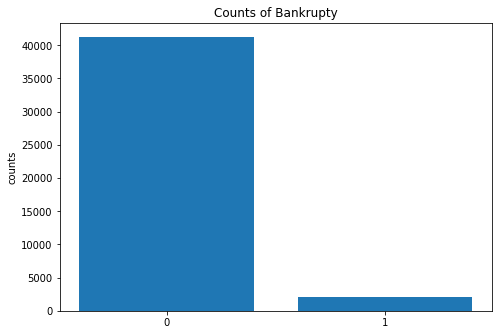

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["0", "1"]
ax.bar(labels,df["class"].value_counts())
plt.ylabel("counts")
plt.title('Counts of Bankrupty')
plt.show()

Use Random Forest and XGBoost to accurately predict bankruptcy. Tune your models for maximum accuracy, but include precision and recall as summary metrics.

In [33]:
# Separate majority and minority classes
df_class0 = df[df['class']==0]
df_class1 = df[df['class']==1]
 
# Downsample majority class
class0_downsampled = resample(df_class0, 
                                 replace=False,    # sample without replacement
                                 n_samples=2091,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([class0_downsampled, df_class1])
 
# Display new class counts
df_downsampled['class'].value_counts()

In [34]:
df_downsampled.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
8237,0.014479,0.75845,0.109750,1.16090,-1.190300e+07,0.00000,0.019361,0.318480,2.2919,0.241550,0.036669,0.028375,0.017591,0.019361,6866.30,0.053158,1.31850,0.019361,0.008447,107.710,0.76025,0.032471,0.006317,0.15540,0.195220,0.046721,1.87600,0.52789,4.3342,0.32831,0.014946,110.300,3.3114,2.97910,0.034054,2.2919,1.52460,0.317460,0.014858,0.008944,0.47319,0.014167,125.170,17.457,0.021407,0.16960,109.260,0.011515,0.005024,1.04440,0.68234,0.30199,1.161800,1.526900,2369.00,0.014858,0.059942,0.99340,0.31423,3.3886,20.9080,108.660,3.3590,11.0240,0
9580,0.115590,0.60420,0.071604,1.24150,-5.269200e+01,0.00000,0.115590,0.655090,1.4205,0.395800,0.115590,0.389820,0.206680,0.115590,751.13,0.485940,1.65510,0.115590,0.081375,42.107,1.49600,0.000000,0.081375,0.14031,0.275250,0.485940,0.00000,0.11332,3.6178,0.41324,0.181910,120.080,3.0397,1.49190,0.000829,1.4205,0.79055,0.654190,0.000584,0.103820,0.11314,0.000000,86.682,44.575,0.705390,0.68884,66.358,-0.178010,-0.125310,0.60931,0.29654,0.32898,0.626410,1.035300,296.97,0.365460,0.292050,0.63455,0.65281,8.6684,8.1885,76.194,4.7904,2.2482,0
5380,0.166560,1.05520,-0.637570,0.38956,-2.196900e+02,-0.25597,0.166560,-0.052277,1.5713,-0.055161,0.179470,0.159470,0.156420,0.166560,1567.00,0.232930,0.94772,0.166560,0.106000,38.175,0.94553,0.179170,0.106000,0.25972,-0.089411,0.232930,13.88200,-1.07490,3.1643,0.65063,0.106020,272.440,1.3397,1.32610,0.172010,1.5713,0.00000,-0.055161,0.109470,0.034947,0.13612,0.114020,86.036,47.861,1.013500,0.23222,42.868,0.099947,0.063608,0.38561,1.04440,0.74641,-0.093001,-0.093001,-930.75,0.109470,-3.019600,0.89451,0.00000,9.5612,7.6262,242.620,1.5044,2.6492,0
9260,0.061915,0.39535,0.420990,2.43620,2.131300e+01,0.27931,0.078735,1.522000,1.0492,0.601740,0.078735,0.268610,0.053901,0.078735,1302.80,0.280160,2.52940,0.078735,0.038316,54.365,0.83786,0.084152,0.030131,0.35382,0.601740,0.237610,0.42969,1.47250,4.7831,0.16541,0.038316,54.629,6.6814,0.21285,0.084152,2.1464,3.99130,0.703970,0.040952,0.192120,0.11188,0.040952,116.840,62.475,0.202290,1.39210,57.042,0.052126,0.025367,1.80630,0.29312,0.14967,2.104700,2.462300,25550.00,0.046935,0.102890,0.95307,0.16989,6.7139,5.8423,52.065,7.0104,7.1874,0
5216,0.028050,0.59977,0.305530,1.50940,3.766900e+01,0.00000,0.034848,0.667310,1.5127,0.400230,0.046262,0.058102,0.025748,0.034848,5620.40,0.064942,1.66730,0.034848,0.023036,36.355,1.68760,0.036762,0.018543,0.11968,0.393920,0.053608,3.22080,3.22640,3.8988,0.38181,0.030581,148.490,2.4582,2.45820,0.038408,1.5127,0.00000,0.400230,0.025390,0.038714,0.48924,0.024301,212.830,176.480,0.186170,1.25820,37.302,0.032659,0.021590,1.50940,0.59977,0.40681,4.226400,4.226400,2420.20,0.025390,0.070086,0.97712,0.00000,10.0400,2.0682,144.720,2.5222,15.9740,0


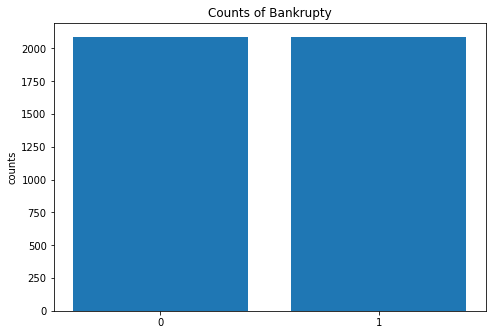

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["0", "1"]
ax.bar(labels,df_downsampled["class"].value_counts())
plt.ylabel("counts")
plt.title('Counts of Bankrupty')
plt.show()

In [36]:
df_downsampled.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,4182.000000,4182.000000,4182.000000,4182.000000,4.182000e+03,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4.182000e+03,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4.182000e+03,4182.000000,4182.000000,4182.000000,4182.000000,4.182000e+03,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4.182000e+03,4182.000000,4.182000e+03,4182.000000,4182.000000,4182.00000
mean,-0.087040,0.905892,-0.275016,4.150700,-3.408697e+03,-0.460398,-0.197246,5.537860,2.397158,0.480173,-0.026009,-1.524613,0.166481,-0.197246,5.731843e+03,-0.980542,6.620346,-0.197246,-0.041763,63.855588,1.202281,-0.029631,-0.029370,0.016424,0.062455,-0.982348,8.472408e+02,4.184636,3.902056,4.391220,0.001088,3.121089e+03,8.578163,4.848156,-0.120356,2.964161,129.466299,0.605323,-1.854747,1.704359,0.250976,0.003542,217.535041,153.679607,120.713015,3.167629,75.603321,-0.131303,-0.204672,3.449659,0.865587,0.970683,38.074201,38.857783,3664.467189,-1.811004,-0.494125,15.284895,0.459853,1.344019e+03,41.330418,7.990652e+02,8.382545,86.204525,0.50000
std,7.539419,14.010380,12.274086,36.695126,1.857351e+05,16.785975,11.037604,72.850658,27.826166,22.053390,7.631975,100.976485,12.688905,11.037604,1.678435e+05,98.104211,72.875459,11.037604,3.252641,267.306537,6.564590,7.111706,3.432955,8.114739,17.810197,98.152010,2.952353e+04,62.904467,0.842241,142.067957,3.192222,1.006953e+05,56.303538,26.570990,7.292049,31.586486,6181.158108,22.605019,116.320728,17.263675,18.400571,2.798659,2835.118500,2752.878138,5926.371878,34.178396,615.175788,8.658716,8.098643,35.284130,12.284322,13.896975,1423.791279,1428.111162,36164.387438,116.323083,21.818230,922.723448,10.862568,7.469197e+04,1672.148076,1.938760e+04,40.999599,2165.281110,0.50006
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-2.003200,-3.496000,-479.910000,-463.890000,-6331.800000,-118.930000,-517.480000,-1.243300e+06,-6331.800000,-0.002321,-517.480000,-118.930000,0.000000,-0.005694,-431.590000,-118.930000,-463.890000,-500.930000,-6331.800000,-1.093400e+05,-226.520000,0.445290,-23.060000,-59.896000,-2.551000e+02,-1.433400,-38.524000,-431.590000,0.000000,-377.130000,-479.910000,-7522.000000,-9.068600,-667.730000,-59.896000,0.000000,0.000000,-1318.100000,-9.049000,0.000000,-542.560000,-515.270000,-0.012175,-0.186610,-0.697640,-516.600000,-227.600000,-800470.000000,-7522.100000,-1236.300000,-0.175640,-256.990000,0.000000e+00,0.000000,-2.365300e+02,-1.543200,0.000000,0.00000
25%,-0.045561,0.338735,-0.058657,0.891672,-7.240500e+01,-0.041235,-0.044656,0.254715,0.995673,0.198590,-0.026534,-0.096690,-0.008954,-0.044656,-4.491950e+02,-0.018662,1.268875,-0.044656,-0.030581,13.924000,0.898772,-0.021380,-0.030512,-0.044006,0.037416,-0.018676,0.000000e+00,-0.104607,3.391450,0.118245,-0.023805,5.298875e+01,2.460650,0.235855,-0.040852,1.089975,0.000000,0.308177,-0.028875,0.033242,0.001017,-0.014508,64.318000,31.451250,-0.151525,0.415947,13.882000,-0.073030,-0.055034,0.653635,0.239407,0.144410,0.484293,0.781223,-231.000000,-0.014884,-0.025301,0.897870,0.000000,4.275125e+00,4.395475,4.928075e+01,2.474475,1.946075,0.00000
50%,0.020640,0.575845,0.118640,1.296

In [37]:
X=df_downsampled.loc[:,df_downsampled.columns !='class'] # Features
y=df_downsampled['class']  # Labels

In [38]:
scaler = StandardScaler()

In [39]:
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=444)

In [41]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=161, criterion='entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100.0))
print("Precision: %.2f%%" % (metrics.precision_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % (metrics.recall_score(y_test, y_pred)*100.0))

Accuracy: 79.51%
Precision: 76.29%
Recall: 84.71%


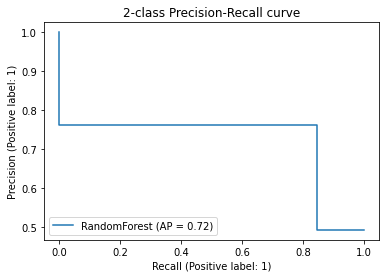

In [43]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="RandomForest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [44]:
# fit model no training data
model = XGBClassifier(alpha = .005)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[03:31:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [45]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)


print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 86.10%
Precision: 84.76%
Recall: 87.50%


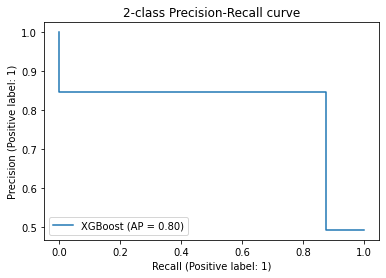

In [46]:
display = PrecisionRecallDisplay.from_predictions(y_test, predictions, name="XGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")